In [1]:
import sys; sys.path.append('/sj0243/')

In [2]:
from python_for_nustar.nu_core import np, plt, os, glob, scan_phase_resolved_products, reduce_list, create_dir, pd, make_grppha_and_wd
from python_for_nustar.nu_class import NustarObservation
from python_for_nustar.pipeline.sj0243_init import Nu_path, ObsList
from python_for_nustar.pyxspec_lib.definitions import Model, Xset, AllModels, Fit, Plot, AllData, AllModels, xspec, showmodel
from python_for_nustar.pyxspec_lib.nustar_xspec import fit_spectra, ph_res_param, query_par, scan_containers_ph_res, plot_ph_res_storage
from python_for_nustar.pyxspec_lib.storage import Container, Storage
#prodpath_ph_res = 'phase_resolved' 
prod_shift = 0
ObsID = ObsList[1] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'
model_name = 'relxilllp'
AllModels.lmod('relxill', '/sj0243/python_for_nustar/relxill_model/')
calc_errors = True

AllModels.clear()
Xset.parallel.error = 22



pd.set_option('display.max_columns', 500)


###
Observation 90302319004 loaded successfully


## Phase-averaged spectra

deleted xspec/relxilllp/*90302319004_relxilllp* and xspec/relxilllp/xcm/*90302319004_relxilllp* files
Try loading storage xspec/relxilllp/90302319004_relxilllp.storage
no storage found. fitting...
 loaded spe_and_lcA_sr.pi and spe_and_lcB_sr.pi from /sj0243/results/out90302319004/products/spe_and_lc
fitting done
skipping errors for: []
    18     0.997163     0.999949    (-0.00139162,0.00139446)
     3      1.22087      1.23561    (-0.00747858,0.00726203)
     4      1029.11      1139.29    (-56.5695,53.6105)
     8      63.4955      77.2315    (-6.72917,7.00689)
    11      1.24682      1.29997    (-0.0265594,0.026588)
    12      3.49151      3.55375    (-0.0323858,0.029854)
    14      20.4437      21.4599    (-0.497263,0.518878)
    15     0.174859     0.193079    (-0.00756845,0.0106516)
Fit done 
 chi2 = 2557.921006672829 for 2310 dof, chi2_red = 1.107325111113779, H0 prob = 0.0002044162768
    17     0.434309     0.455623    (-0.0103786,0.0109356)
<Storage with 2 containers>


,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90302319004_relxilllp_FPMA,constant,factor,1,1.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
1,0,90302319004_relxilllp_FPMA,phabs,nH,2,0.800000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
2,0,90302319004_relxilllp_FPMA,bbodyrad,kT,3,1.228351,1.220873,1.235613,FFFFFFFFF,0.004390,False,
3,0,90302319004_relxilllp_FPMA,bbodyrad,norm,4,1085.681962,1029.112337,1139.292358,FFFFFFFFF,32.523771,False,
4,0,90302319004_relxilllp_FPMA,relxilllp,h,5,5.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
5,0,90302319004_relxilllp_FPMA,relxilllp,a,6,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
6,0,90302319004_relxilllp_FPMA,relxilllp,Incl,7,10.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
7,0,90302319004_relxilllp_FPMA,relxilllp,Rin,8,70.224586,63.495454,77.231514,FFFFFFFFF,3.841306,False,
8,0,90302319004_relxilllp_FPMA,relxilllp,Rout,9,77.247045,0.000000,0.000000,FFFFFTFFF,0.000000,False,= 1.1*p8
9,0,90302319004_relxilllp_FPMA,relxilllp,z,10,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,


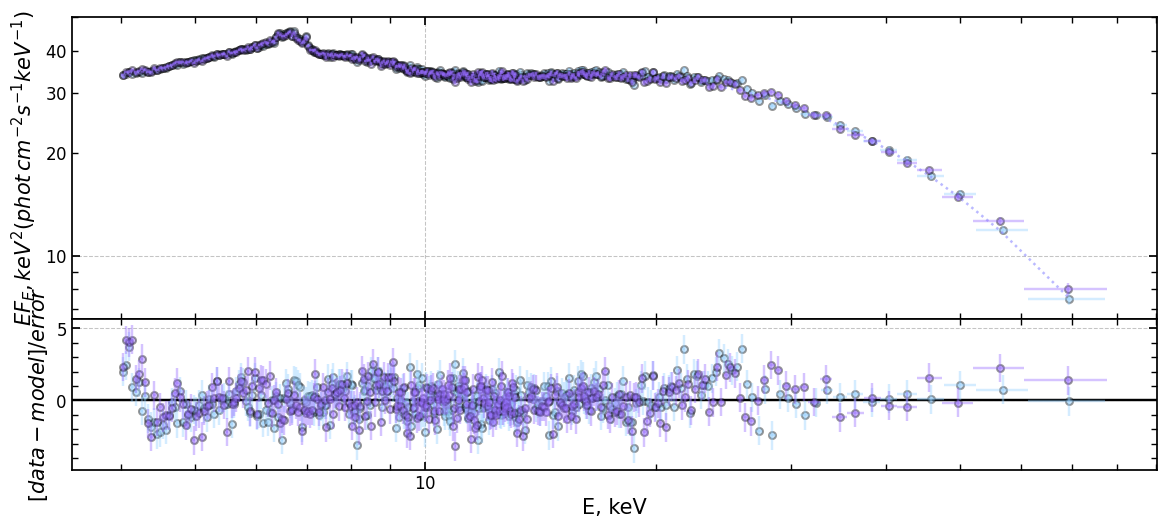

In [7]:
os.chdir(ph_ave_folder)
create_dir('xspec')



mo_cutoffpl = Model("constant*phabs*(bbodyrad+relxilllp)")
mo_cutoffpl.phabs.nH = '0.8 -1'



mo_cutoffpl.bbodyrad.kT = '1'
mo_cutoffpl.bbodyrad.norm = '1e3' # ,, 0.1, 0.2, 3, 4'



mo_cutoffpl.relxilllp.h = '5 -1'
mo_cutoffpl.relxilllp.a = '0 -1'
mo_cutoffpl.relxilllp.Incl = '10'
mo_cutoffpl.relxilllp.Incl.frozen = True
mo_cutoffpl.relxilllp.Rin = '70 0.1, 0, 0, 900, 900'
mo_cutoffpl.relxilllp.Rout = '=1.1*p8'
mo_cutoffpl.relxilllp.z = '0 -1'
mo_cutoffpl.relxilllp.gamma = '1.2  0.005 0.3 0.3 3 3'
mo_cutoffpl.relxilllp.logxi = '4'
mo_cutoffpl.relxilllp.Ecut = '20'
mo_cutoffpl.relxilllp.Ecut.frozen = False
mo_cutoffpl.relxilllp.refl_frac = '0.3'
mo_cutoffpl.relxilllp.fixReflFrac = '0'
mo_cutoffpl.relxilllp.Afe = '5 -1'

#steppar 7 10 30 10 8 50 90 10
mo_fid_pars = fit_spectra(model = mo_cutoffpl, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', min_bin='50', min_sig='50', rewrite = True, calc_errors = calc_errors, eqw_comps='')
mo_fid_pars

## Phase-resolved spectra

#### fit

In [9]:
xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/{model_name}/xcm/{ObsID}_{model_name}.xcm_model')

model = AllModels(1)
model.bbodyrad.kT.frozen = True
model.bbodyrad.norm.frozen = True
model.relxilllp.logxi.frozen = True
model.relxilllp.Rin.frozen = True


##################### bin number 1 #####################


rm: cannot remove 'xspec/relxilllp/*90302319004_bin1_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319004_bin1_shift0_relxilllp*': No such file or directory


deleted xspec/relxilllp/*90302319004_bin1_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin1_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319004_bin1_shift0_relxilllp.storage
no storage found. fitting...
 loaded phase_resolved_bin1A_sr.pi and phase_resolved_bin1B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    18     0.996534      1.00533    (-0.00438881,0.00440805)
    11      1.36459      1.39843    (-0.0169328,0.0169067)
    14      21.7351      23.0155    (-0.625352,0.655026)
    15     0.121976     0.142639    (-0.010198,0.0104643)
Fit done 
 chi2 = 1378.2448812103648 for 1376 dof, chi2_red = 1.0016314543679976, H0 prob = 0.4778794936
    17     0.605257     0.631629    (-0.0130421,0.0133301)
<Storage with 2 containers>
##################### bin number 2 #####################
deleted xspec/relxilllp/*90302319004_bin2_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin2_shift0_relxilllp* 

rm: cannot remove 'xspec/relxilllp/*90302319004_bin2_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319004_bin2_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin2A_sr.pi and phase_resolved_bin2B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    18      0.99446       1.0032    (-0.00435886,0.00437753)
    11      1.36694      1.39975    (-0.0164194,0.0163883)
    14      21.1265      22.3107    (-0.57933,0.604814)
    15     0.118973     0.138924    (-0.00984859,0.0101021)
Fit done 
 chi2 = 1403.7532647043681 for 1384 dof, chi2_red = 1.0142725901043121, H0 prob = 0.3496229613
    17     0.704462     0.734196    (-0.0147127,0.0150218)
<Storage with 2 containers>
##################### bin number 3 #####################
deleted xspec/relxilllp/*90302319004_bin3_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin3_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319004_bin3_shift0_relxilllp.storage
no storage found. fitting...


rm: cannot remove 'xspec/relxilllp/*90302319004_bin3_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319004_bin3_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin3A_sr.pi and phase_resolved_bin3B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    18     0.994758      1.00363    (-0.00442579,0.00444524)
    11      1.12673      1.18568    (-0.0298847,0.0290678)
    14       15.107      16.1408    (-0.503358,0.530488)
    15     0.214601     0.245695    (-0.0153802,0.0157142)
    17     0.363502     0.384395    (-0.0103427,0.0105502)
Fit done 
 chi2 = 1418.7160167375282 for 1313 dof, chi2_red = 1.0805148642326947, H0 prob = 0.02153689063
<Storage with 2 containers>
##################### bin number 4 #####################


rm: cannot remove 'xspec/relxilllp/*90302319004_bin4_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319004_bin4_shift0_relxilllp*': No such file or directory


deleted xspec/relxilllp/*90302319004_bin4_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin4_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319004_bin4_shift0_relxilllp.storage
no storage found. fitting...
 loaded phase_resolved_bin4A_sr.pi and phase_resolved_bin4B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    18     0.992415      1.00147    (-0.00451491,0.00453513)
    11        0.898     0.992305    (-0.0475559,0.0467485)
    14      13.2601      14.2777    (-0.493525,0.524071)
    15     0.315809     0.355575    (-0.0196115,0.0201542)
Fit done 
 chi2 = 1365.4573343650363 for 1293 dof, chi2_red = 1.0560381549613584, H0 prob = 0.07895748266
    17     0.214606     0.228892    (-0.00701124,0.00727417)
<Storage with 2 containers>
##################### bin number 5 #####################
deleted xspec/relxilllp/*90302319004_bin5_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin5_shift0_relxill

rm: cannot remove 'xspec/relxilllp/*90302319004_bin5_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319004_bin5_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin5A_sr.pi and phase_resolved_bin5B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    18      0.99434      1.00316    (-0.00439922,0.00441852)
    11      1.31887      1.35323    (-0.0171977,0.017161)
    14      20.6742      21.8505    (-0.57566,0.600669)
    15     0.157066     0.180334    (-0.0114773,0.0117903)
Fit done 
 chi2 = 1414.844992935622 for 1375 dof, chi2_red = 1.0289781766804524, H0 prob = 0.2220526133
    17     0.496004     0.518173    (-0.010973,0.0111953)
<Storage with 2 containers>
##################### bin number 6 #####################
deleted xspec/relxilllp/*90302319004_bin6_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin6_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319004_bin6_shift0_relxilllp.storage
no storage found. fitting...


rm: cannot remove 'xspec/relxilllp/*90302319004_bin6_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319004_bin6_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin6A_sr.pi and phase_resolved_bin6B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    18     0.988773     0.997409    (-0.00430881,0.00432729)
    11      1.44247      1.47512    (-0.0163667,0.0162818)
    14      27.0403      28.8403    (-0.875852,0.924141)
    15     0.108424     0.126679    (-0.00905049,0.00920506)
Fit done 
 chi2 = 1381.5462499647801 for 1440 dof, chi2_red = 0.9594071180310974, H0 prob = 0.8625511654
    17     0.880271     0.917655    (-0.018471,0.0189135)
<Storage with 2 containers>
##################### bin number 7 #####################
deleted xspec/relxilllp/*90302319004_bin7_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin7_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319004_bin7_shift0_relxilllp.storage
no storage found. fitting...


rm: cannot remove 'xspec/relxilllp/*90302319004_bin7_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319004_bin7_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin7A_sr.pi and phase_resolved_bin7B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    18     0.988638     0.997263    (-0.00430349,0.00432194)
    11      1.41244      1.44503    (-0.0163424,0.0162518)
    14      28.8784      30.8576    (-0.962125,1.01704)
    15     0.109605     0.127953    (-0.00909935,0.00924843)
    17     0.879447     0.916197    (-0.0181604,0.0185897)
Fit done 
 chi2 = 1559.087042125158 for 1480 dof, chi2_red = 1.0534371906251068, H0 prob = 0.07482986795
<Storage with 2 containers>
##################### bin number 8 #####################


rm: cannot remove 'xspec/relxilllp/*90302319004_bin8_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319004_bin8_shift0_relxilllp*': No such file or directory


deleted xspec/relxilllp/*90302319004_bin8_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin8_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319004_bin8_shift0_relxilllp.storage
no storage found. fitting...
 loaded phase_resolved_bin8A_sr.pi and phase_resolved_bin8B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    18     0.995312      1.00412    (-0.00439367,0.00441277)
    11      1.20801      1.24292    (-0.0174698,0.0174388)
    14      22.8662      24.1923    (-0.647951,0.678175)
    15     0.162599     0.186829    (-0.0119583,0.0122722)
    17     0.459491     0.479614    (-0.00997052,0.0101533)
Fit done 
 chi2 = 1598.4655072858932 for 1452 dof, chi2_red = 1.100871561491662, H0 prob = 0.004098653262
<Storage with 2 containers>
##################### bin number 9 #####################
deleted xspec/relxilllp/*90302319004_bin9_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin9_shift0_relxilll

rm: cannot remove 'xspec/relxilllp/*90302319004_bin9_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319004_bin9_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin9A_sr.pi and phase_resolved_bin9B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    18     0.996236      1.00538    (-0.0045625,0.00458289)
    11     0.481058      0.58759    (-0.0538938,0.0526382)
    14      11.2411      12.0452    (-0.392443,0.411639)
    15     0.335205     0.373852    (-0.0191953,0.0194508)
    17     0.150489     0.159479    (-0.00442432,0.00456547)
Fit done 
 chi2 = 1446.0158525101456 for 1320 dof, chi2_red = 1.0954665549319285, H0 prob = 0.00839015715
<Storage with 2 containers>
##################### bin number 10 #####################
deleted xspec/relxilllp/*90302319004_bin10_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319004_bin10_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319004_bin10_shift0_relxilllp.storage
no storage found. fitting...


rm: cannot remove 'xspec/relxilllp/*90302319004_bin10_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319004_bin10_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin10A_sr.pi and phase_resolved_bin10B_sr.pi from /sj0243/results/out90302319004/products/phase_resolved
fitting done
skipping errors for: []
    18     0.992983      1.00205    (-0.0045223,0.00454251)
    11     0.933507      1.02445    (-0.0463746,0.0445634)
    14      14.1005      15.2627    (-0.549558,0.612616)
    15      0.26701     0.304557    (-0.0186957,0.0188504)
    17     0.214977     0.229779    (-0.00702006,0.00778226)
Fit done 
 chi2 = 1389.4269274171954 for 1306 dof, chi2_red = 1.0638797300284804, H0 prob = 0.05349919447
<Storage with 2 containers>


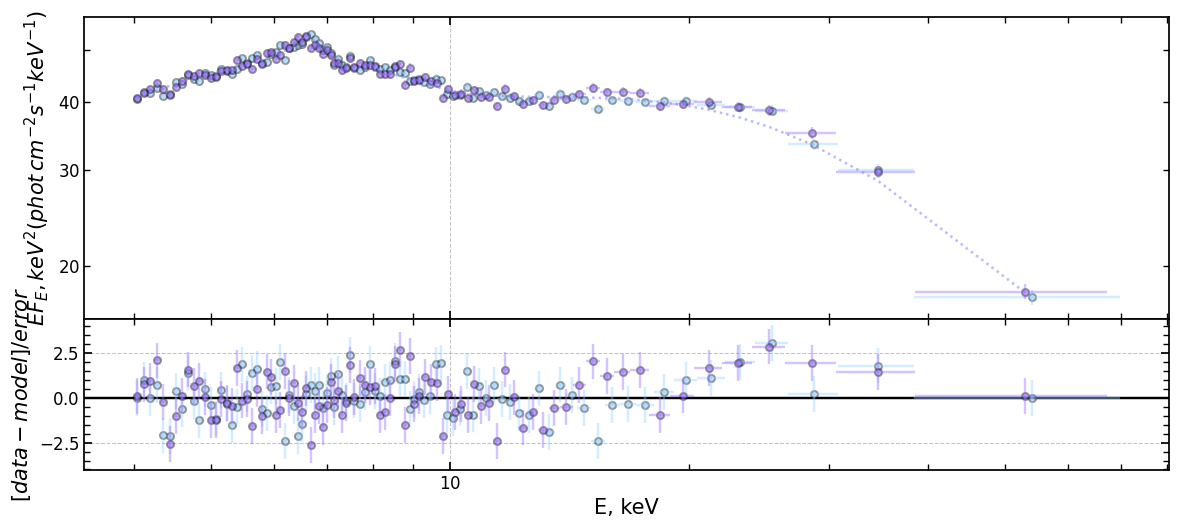

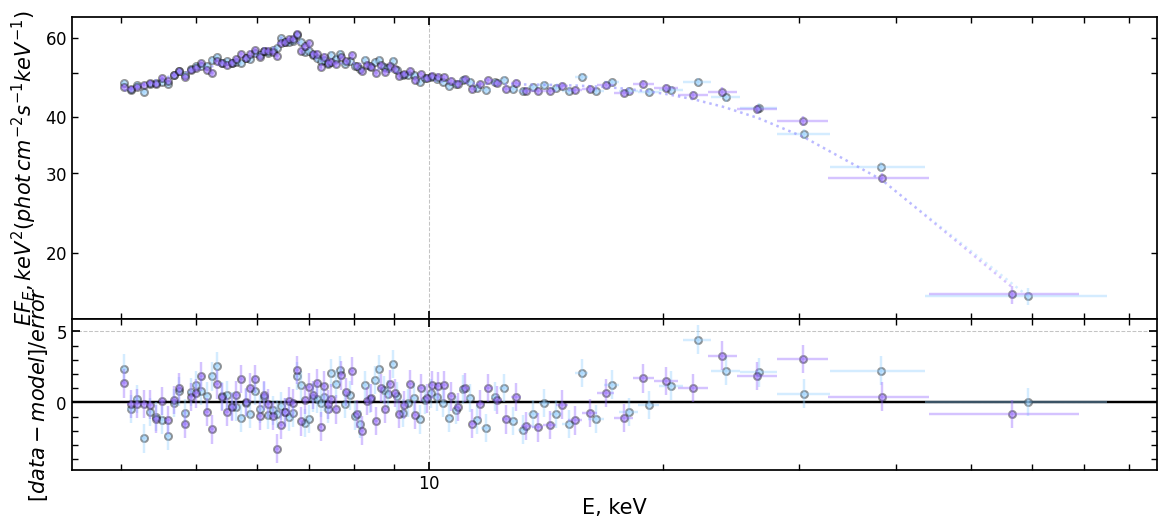

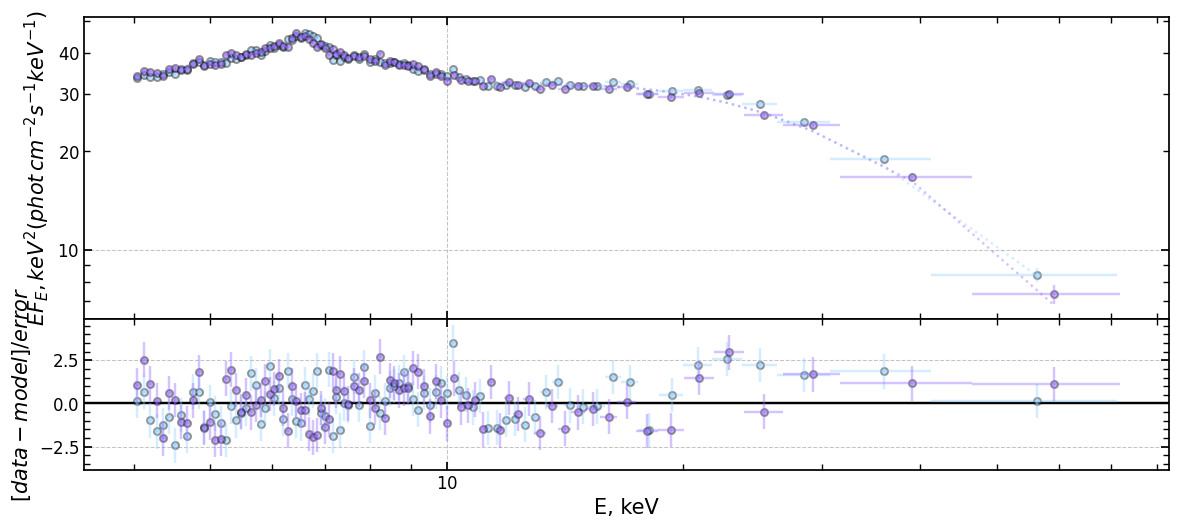

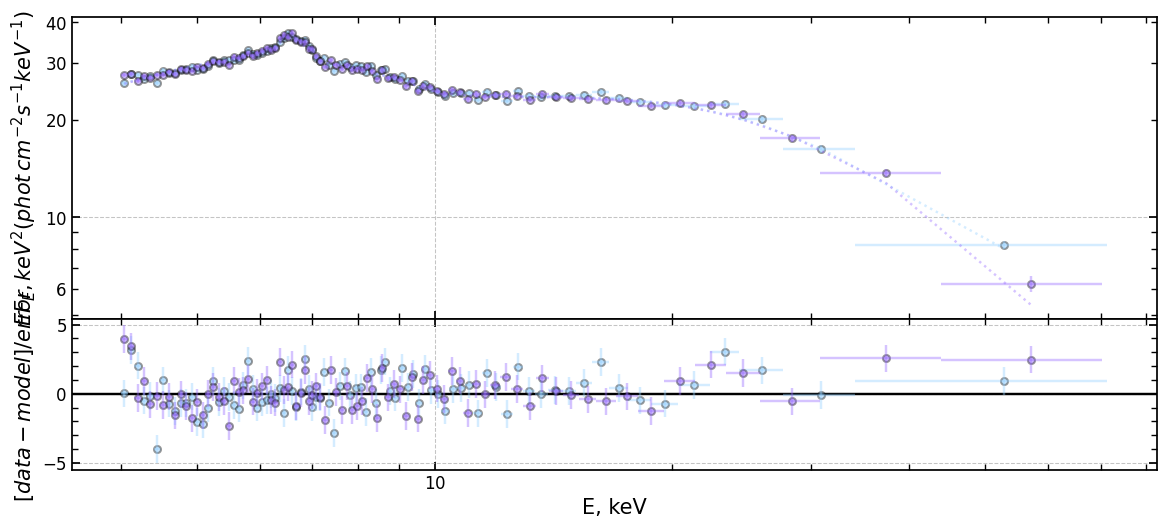

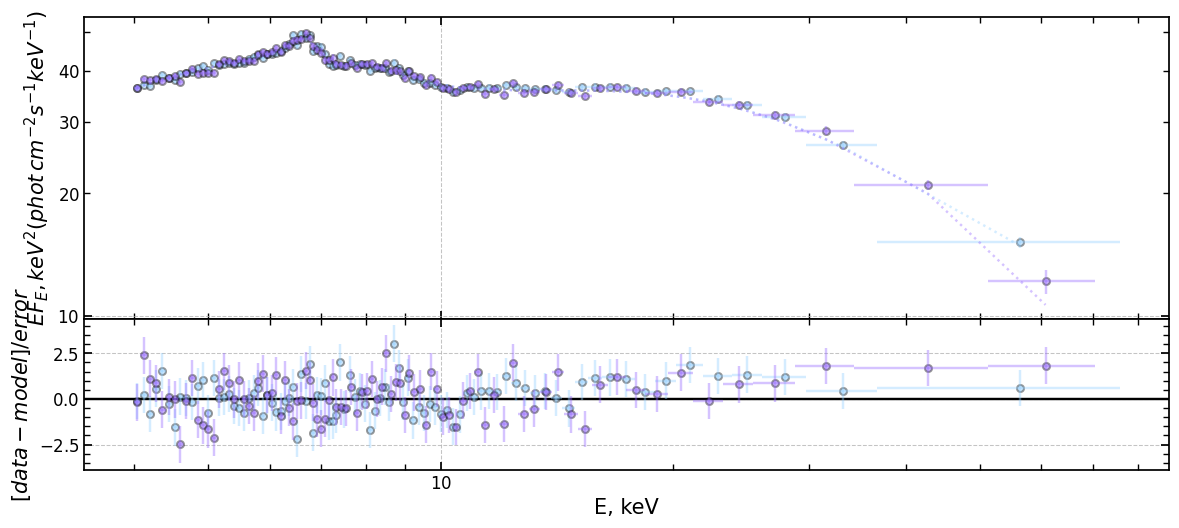

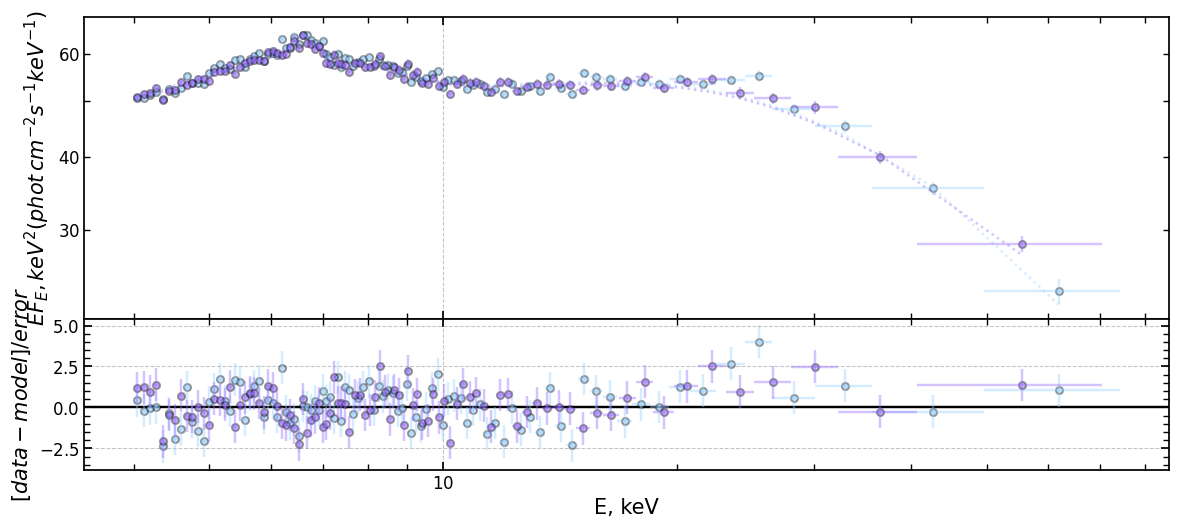

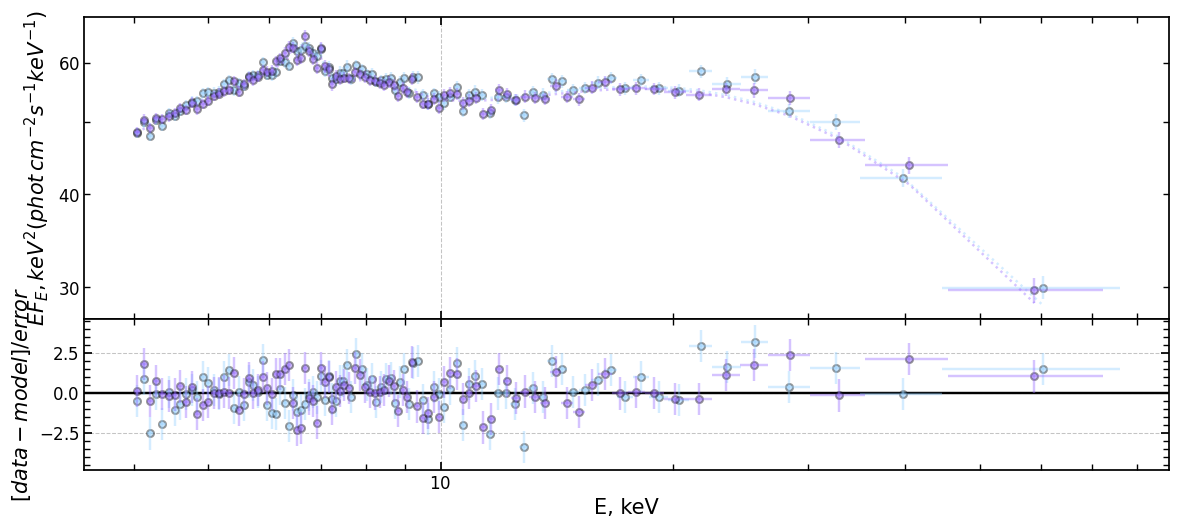

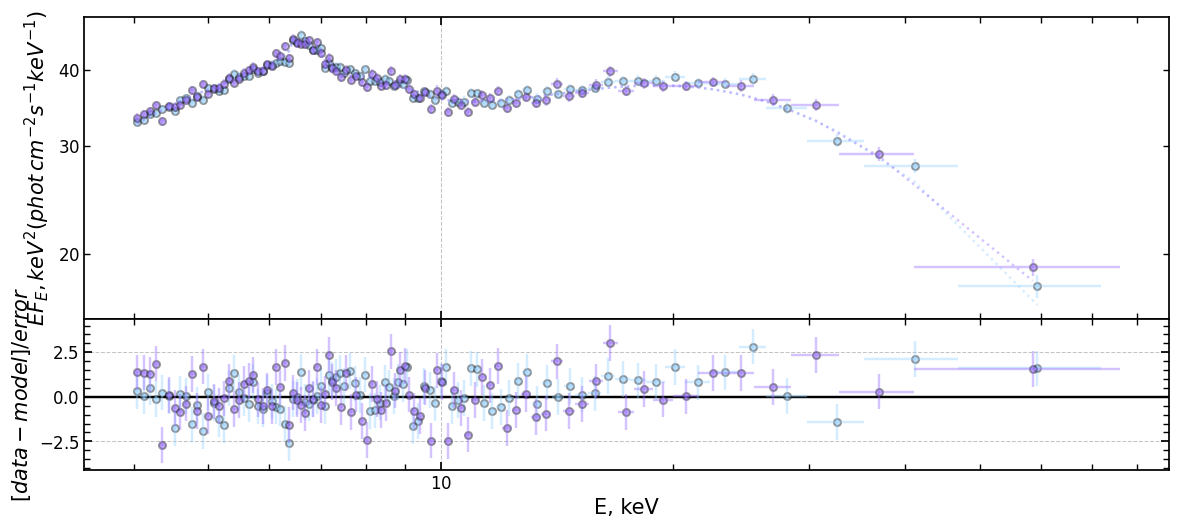

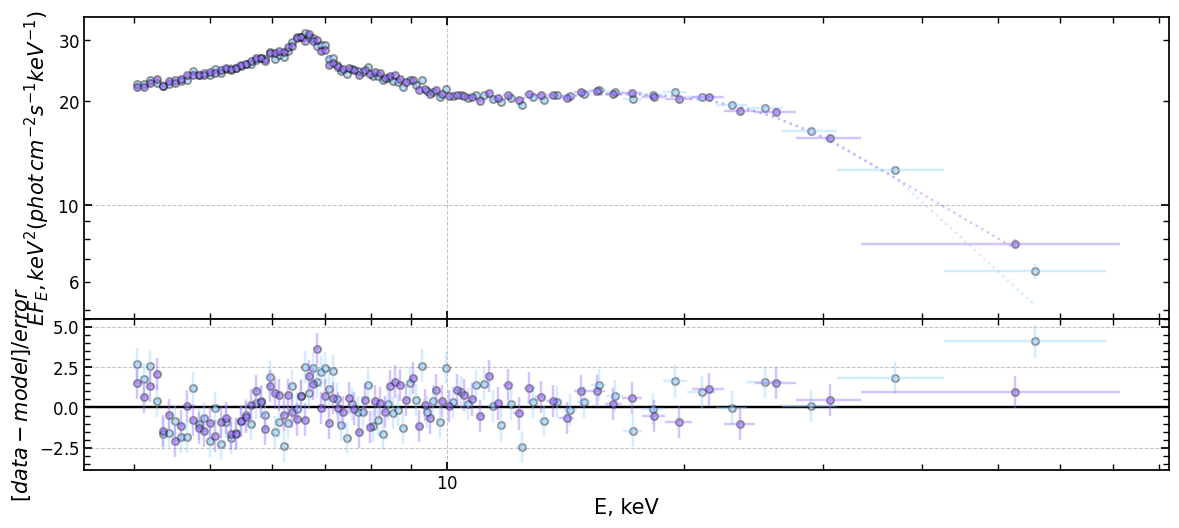

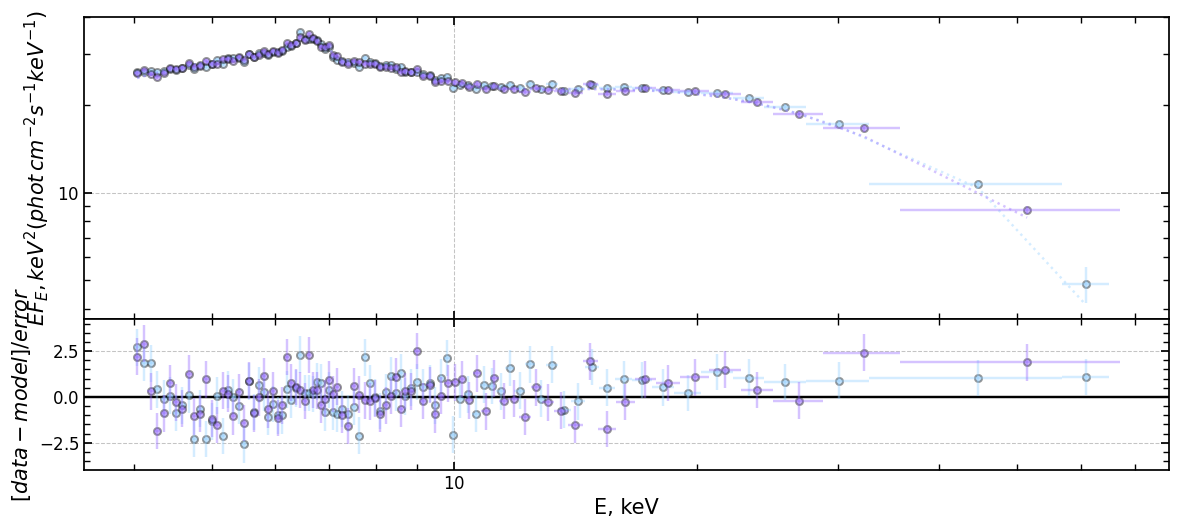

In [10]:
os.chdir(ph_res_folder)
create_dir('xspec')
for binnum in range(1,11):
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}_shift{prod_shift}', dataset=f'phase_resolved_bin{binnum}', rewrite = True, calc_errors=calc_errors, eqw_comps='')


#### plot results

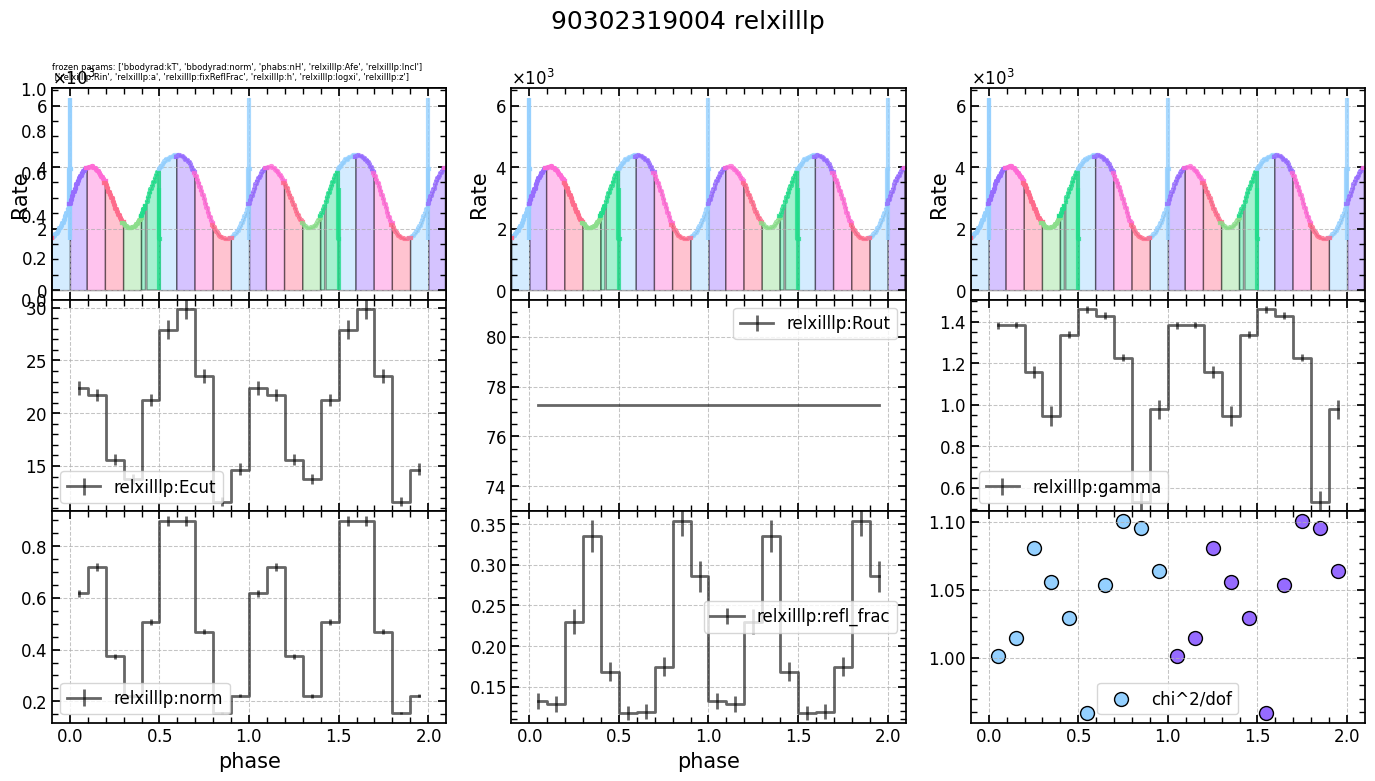

In [3]:
os.chdir(ph_res_folder)
ph_res_results_reind = scan_containers_ph_res(model_name)
ph_res_results_reind = ph_res_results_reind.sort_index()
#ph_res_results_reind.head(25)
plot_ph_res_storage(ph_res_results_reind, nu_obs, 'phase_resolved');


In [5]:
df, title = query_par(fit_res = ph_res_results_reind, ObsID = ObsID, model = 'relxilllp',    comp = 'relxilllp',     par =  'refl_frac', shift = 0)
title = title.rsplit('.', 1)[1]



In [8]:
df.val.values

array([0.13217424, 0.12882162, 0.22998102, 0.33542073, 0.16854346,
       0.11747422, 0.11870482, 0.17455729, 0.35440071, 0.28570616])

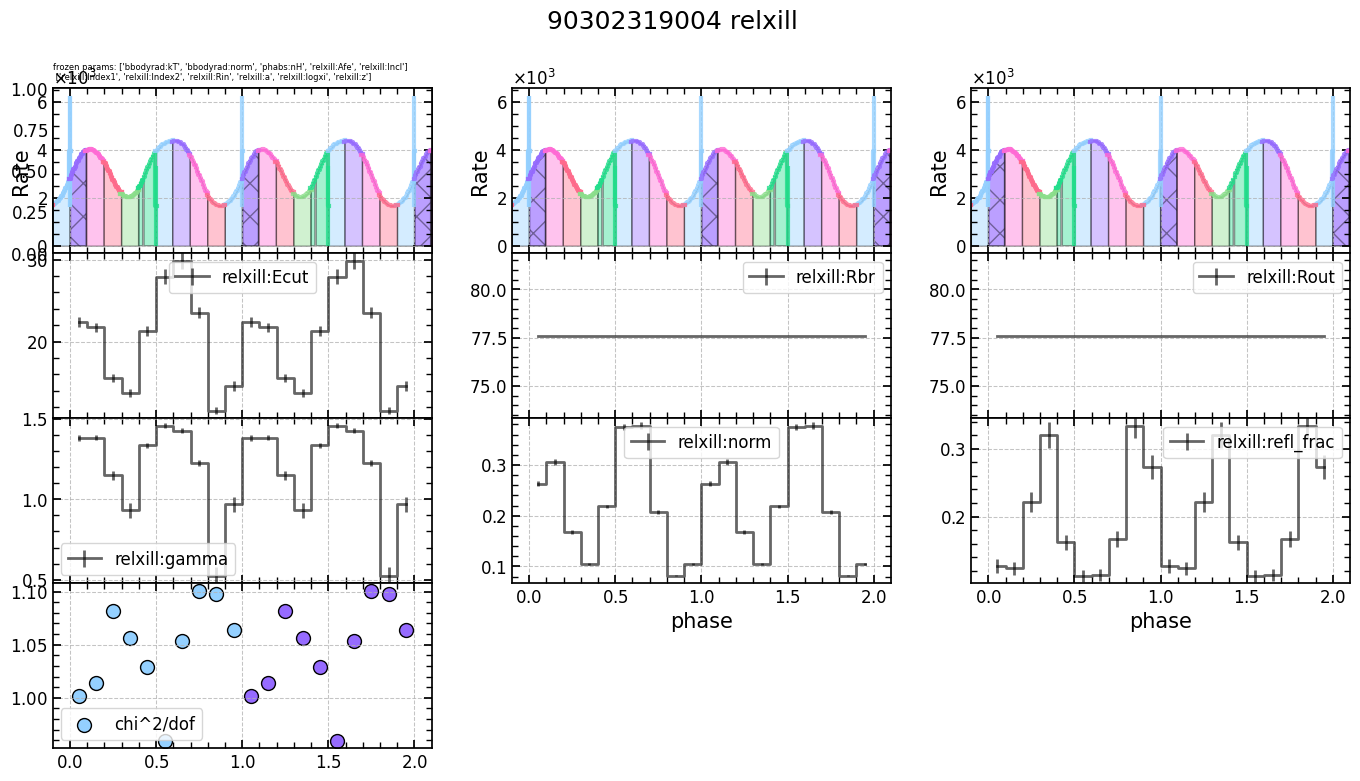

In [16]:
# os.chdir(ph_res_folder)
# ph_res_results_reind = scan_containers_ph_res(model_name)
# ph_res_results_reind = ph_res_results_reind.sort_index()
# #ph_res_results_reind.head(25)
# plot_ph_res_storage(ph_res_results_reind, nu_obs, 'phase_resolved');
